In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import os
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#from xgboost import XGBRegressor
import category_encoders as ce
#import missingno as mn
#import lightgbm as ltb
from sklearn.ensemble import ExtraTreesRegressor
random.seed(0)

In [170]:
previous_application = pd.read_csv("data/previous_application.csv")
#application_train = pd.read_csv('data/application_train.csv')

In [171]:
pd.set_option('display.max_columns', None)

In [172]:
previous_application.head(20)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Y,1,NaN,NaN,NaN,Everyday expenses,Approved,-684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
previous_application.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [174]:
#previous_application.fillna(0)

In [175]:
previous_application.shape

(1670214, 37)

In [176]:
#application_prev_train = application_train.merge(previous_application, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [177]:
#application_prev_train.shape

In [178]:
#application_prev_train.head(30)

In [179]:
previous_application_filtered = previous_application.loc[:, previous_application.columns.intersection([
    'NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'NAME_CASH_LOAN_PURPOSE',
    'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
    'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
    'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 
    'PRODUCT_COMBINATION', 'NFLAG_INSURED_ON_APPROVAL'])]

In [180]:
previous_application_filtered

,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,NFLAG_INSURED_ON_APPROVAL
0,Consumer loans,SATURDAY,XAP,Approved,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,Connectivity,middle,POS mobile with interest,0.0
1,Cash loans,THURSDAY,XNA,Approved,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,XNA,low_action,Cash X-Sell: low,1.0
2,Cash loans,TUESDAY,XNA,Approved,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,high,Cash X-Sell: high,1.0
3,Cash loans,MONDAY,XNA,Approved,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,middle,Cash X-Sell: middle,1.0
4,Cash loans,THURSDAY,Repairs,Refused,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,XNA,high,Cash Street: high,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,Consumer loans,WEDNESDAY,XAP,Approved,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,Furniture,low_normal,POS industry with interest,0.0
1670210,Consumer loans,TUESDAY,XAP,Approved,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,Furniture,middle,POS industry with interest,0.0
1670211,Consumer loans,MONDAY,XAP,Approved,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,Consumer electronics,low_normal,POS household with interest,0.0
1670212,Cash loans,WEDNESDAY,XNA,Approved,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),XNA,low_normal,Cash X-Sell: low,1.0


In [181]:
def plotting(col,graph_name = "Insert graph's name", x_lable = 'x_lable',# y_lable = 'y_lable',
             label_rotation=False,horizontal_layout=True):
    temp = previous_application_filtered[col].value_counts()
    tempdf = pd.DataFrame({x_lable: temp.index, 'Number of applications': temp.values})

    sns.set_color_codes("pastel")
    s = sns.barplot( x = x_lable, y= 'Number of applications', data=tempdf).set(title = graph_name)
    plt.show()

In [182]:
filtered_pre_col = previous_application_filtered.columns.tolist()
x_lable_list = ['Contract product type', 'Day of the Week', 'Purpose of cash loan',
               'Approval status', 'Payment method', 'Reason', 'Type of Suite',
               'Client type', 'Type of Good', 'Portfolio type', 'x-sell or walk-in', 'Channel',
               'Industry', 'Interest rate', 'Product', '1: Yes, 0: No']
graph_name_list = ['Contract product type of previous application', 'Which day did clients applied',
                  'Purpose of cash loan in previous application', 'Approval status of application',
                  'Payment method that client chose', 'Reasons for application rejection',
                  'Who accompanied client when applying', 'Was the client old or new client when applying',
                  'What kind of goods did the client apply for', 'Portfolio type of the application',
                  'Was the application x-sell or walk-in', 'Application channel', 'Industry of the seller',
                  'Interest rate of the application', 'Product combination of the application',
                  'Did the client requested insurance during the application']

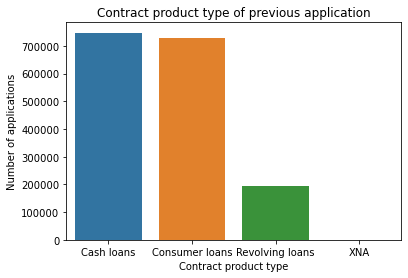

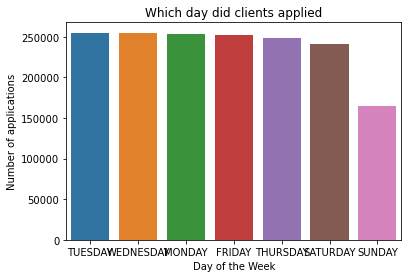

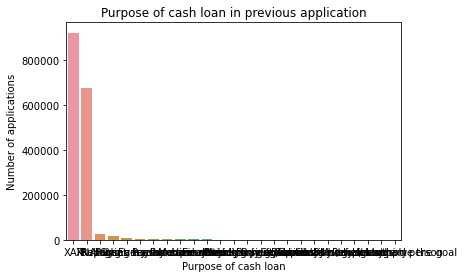

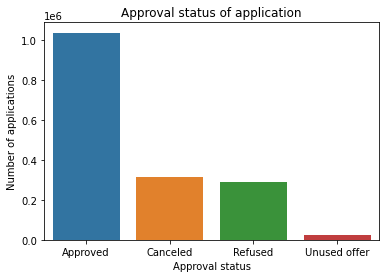

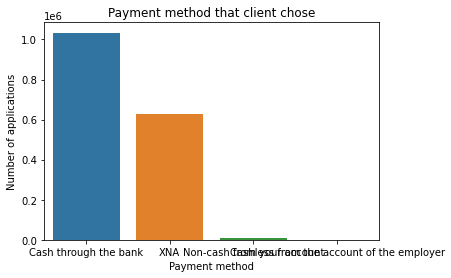

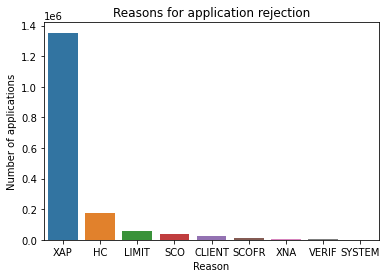

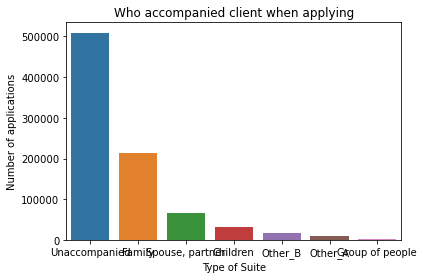

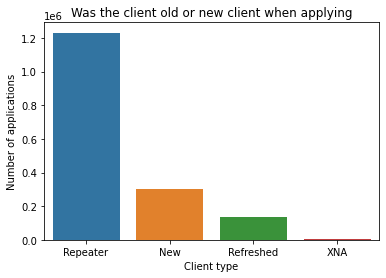

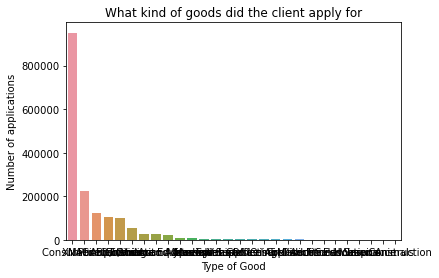

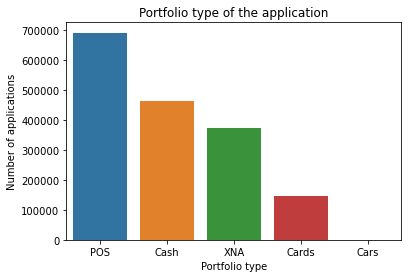

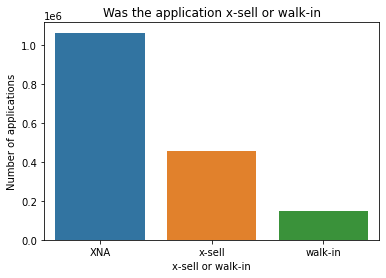

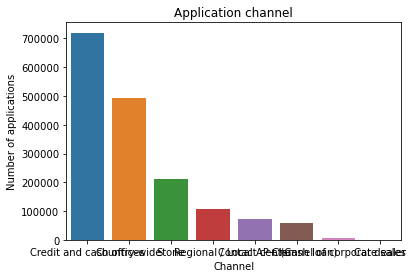

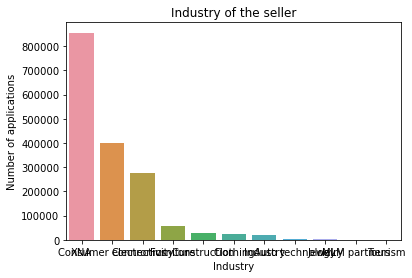

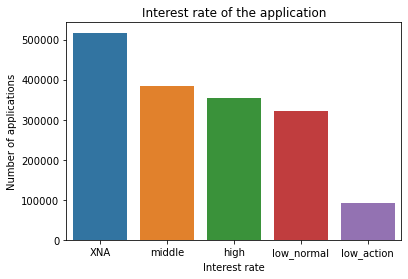

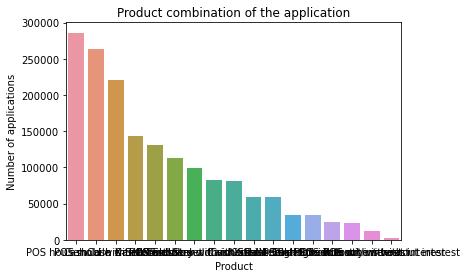

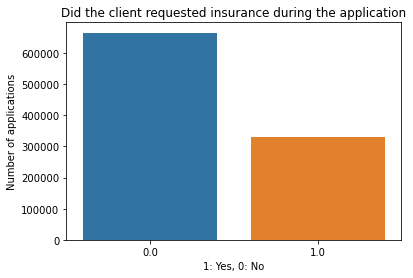

In [183]:
for index in range(0,16):
    plotting(filtered_pre_col[index], graph_name_list[index], x_lable_list[index])

In [184]:
#plotting('NAME_CONTRACT_TYPE', 'Contract product type of previous application')